# 画图

In [352]:
import matplotlib.pyplot as plt
import numpy as np

In [353]:
graph_names = '''WT SX SB USA GL5 TW SD'''.split(' ')
print(graph_names)
ns = '''1140149	6024271	24575383	23947348	24876978	41652231	89247739'''.split('\t')
ns = [int(x) for x in ns]
ms = '''7833140	63497050	122378012	57708624	124384890	1468365182	2043203933'''.split('\t')
ms = [int(x) for x in ms]
print(ns)
print(ms)
methods = ["Strict-Stitch", "Strict-Perch", "Lazy-Stitch", "Lazy-Perch", "OEC-forest", "Link-Cut Tree"]
hatches = ['//', '..', '//', '..', '', '']
qq = 50000000

from matplotlib.ticker import MaxNLocator, FuncFormatter


def draw(ax, categories, values, x_label, alpha=0.6, use_sci=False, hatch=None):
    bars = ax.bar(categories, values, color=colors, alpha=alpha, hatch=hatch, edgecolor='black')
    ax.set_xticks([])  # 隐藏 X 轴刻度
    ax.set_xlabel(x_label, fontsize=20)
    ax.tick_params(axis='y', labelsize=10)  # y 轴刻度

    if not use_sci:
        ax.yaxis.set_major_locator(MaxNLocator(nbins=3))  # 限制最多2个刻度
        ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}'))  # 保留2位小数
        if x_label == 'GL5' and len(categories) == 5:
            ax.yaxis.set_major_locator(MaxNLocator(nbins=2))  # 限制最多2个刻度

    if use_sci:
        ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))  # 使用科学计数法

# colors = ["green", "coral", "blue", "gold", "red"]
# colors = sns.color_palette("pastel", 5)  # 选择 Seaborn 柔和色调
# colors = ["#800080", "#C71585", "#D70000", "#FF8C00", "royalblue", "mediumseagreen"]
colors = ["#C71585", "#C71585", "#FF8C00", "#FF8C00", "royalblue", "mediumseagreen"]

['WT', 'SX', 'SB', 'USA', 'GL5', 'TW', 'SD']
[1140149, 6024271, 24575383, 23947348, 24876978, 41652231, 89247739]
[7833140, 63497050, 122378012, 57708624, 124384890, 1468365182, 2043203933]


[[ 4.31744474  2.80775285  3.27357483  1.05354618  0.92604436  1.62010968
   1.60904359]
 [ 3.63166582  1.94272073  2.26340508  0.83401679  0.72736469  1.65690395
   1.73290377]
 [17.55522187 11.07030406 14.89508423  4.83431128  4.56661086  8.67816325
   8.33725985]
 [17.37223331  9.53910463 14.16477754  3.19361505  2.64677986  6.87512522
   6.62885471]
 [18.2548124  11.75522993  9.88905237  3.92915131  4.03318018  6.57977599
   5.80688763]
 [ 1.69145757  1.00995769  1.37643812  0.71429963  0.58099509  1.09188166
   1.07369192]]


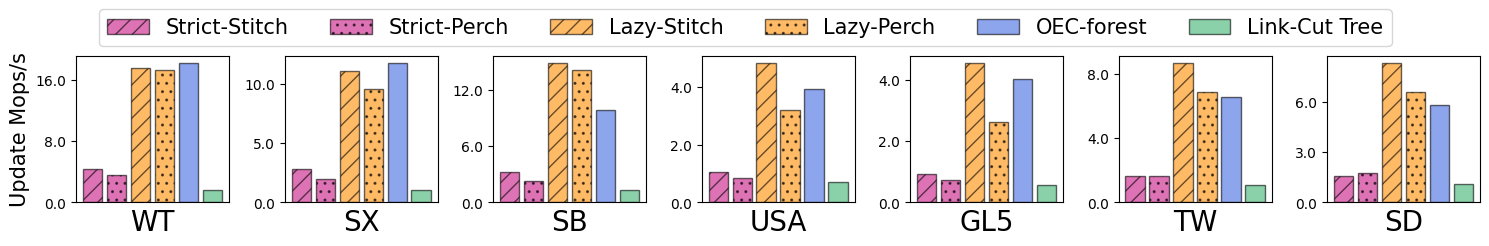

In [354]:
data = '''1.8143	22.6149	37.3836	54.7756	134.3185	906.3369	1269.8251
2.1569	32.6846	54.0681	69.1936	171.0076	886.2102	1179.0637
0.4462	5.7358	8.216	11.9373	27.2379	169.2023	245.069
0.4509	6.6565	8.6396	18.07	46.9948	213.5765	308.2288
0.4291	5.4016	12.3751	14.6873	30.8404	223.1634	351.8587
4.631	62.871	88.9092	80.7905	214.0894	1344.8025	1902.9704'''
data = [list(map(float, line.split('\t'))) for line in data.split('\n')]
data = np.array(data)
for i in range(7):
    data[:, i] = ms[i] / data[:, i]
data = data / 1e6
print(data)

# **创建 2x4 子图网格**
fig, axes = plt.subplots(1, 7, figsize=(15, 2.1))

draw(axes[0], methods, data[:, 0], graph_names[0], hatch=hatches)
draw(axes[1], methods, data[:, 1], graph_names[1], hatch=hatches)
draw(axes[2], methods, data[:, 2], graph_names[2], hatch=hatches)
draw(axes[3], methods, data[:, 3], graph_names[3], hatch=hatches)
draw(axes[4], methods, data[:, 4], graph_names[4], hatch=hatches)
draw(axes[5], methods, data[:, 5], graph_names[5], hatch=hatches)
draw(axes[6], methods, data[:, 6], graph_names[6], hatch=hatches)

axes[0].set_ylabel("Update Mops/s", fontsize=15)


handles = [plt.Rectangle((0, 0), 1, 1, facecolor=colors[i], edgecolor='black') for i in range(len(methods))]
for handle in handles:
    handle.set_alpha(0.6)
handles[0].set_hatch('//')
handles[1].set_hatch('..')
handles[2].set_hatch('//')
handles[3].set_hatch('..')
fig.legend(handles, methods, loc="upper center", ncol=6, fontsize=15, bbox_to_anchor=(0.5, 1.2))


# **美化布局**
plt.tight_layout()
plt.savefig('streaming_build.pdf', bbox_inches='tight')
plt.show()

[[15.35768038 11.72800413  4.45105178  2.66808965  2.94150523  4.68362138
   5.77113968]
 [16.36179194 10.67942502  3.29515349  2.38158747  2.91380385  4.86722218
   5.87571684]
 [15.46120783 11.96315349  4.47787928  2.7014323   3.10092904  4.70823093
   5.73486569]
 [13.08934789  9.33131777  2.18359682  1.40793909  1.70400134  3.55876952
   4.58106189]
 [ 7.14571543  9.38315161  1.94967499  1.64357985  1.62593166  1.91666347
   2.39176086]
 [ 1.13171076  1.10982618  0.45881452  0.2272843   0.26814454  0.53845251
   0.7432778 ]]


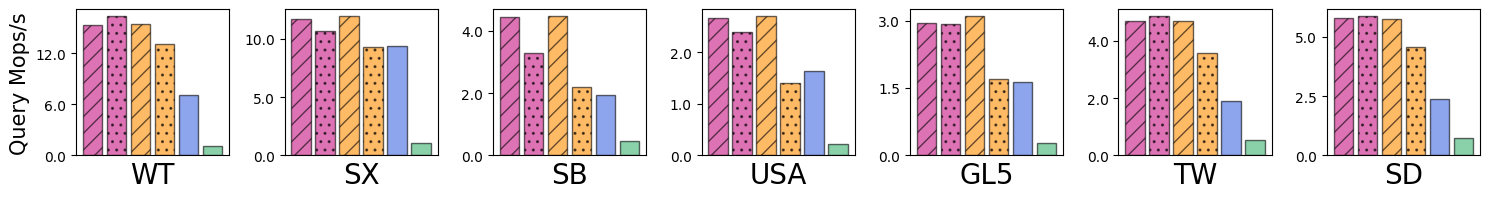

In [355]:

data = '''3.2557	4.2633	11.2333	18.74	16.9981	10.6755	8.6638
3.0559	4.6819	15.1738	20.9944	17.1597	10.2728	8.5096
3.2339	4.1795	11.166	18.5087	16.1242	10.6197	8.7186
3.8199	5.3583	22.898	35.5129	29.3427	14.0498	10.9145
6.9972	5.3287	25.6453	30.4214	30.7516	26.087	20.9051
44.1809	45.0521	108.9765	219.9888	186.4666	92.8587	67.2696'''
data = [list(map(float, line.split('\t'))) for line in data.split('\n')]
data = np.array(data)
data = qq / data
data = data / 1e6
print(data)

# **创建 2x4 子图网格**
fig, axes = plt.subplots(1, 7, figsize=(15, 2.1))

draw(axes[0], methods, data[:, 0], graph_names[0], hatch=hatches)
draw(axes[1], methods, data[:, 1], graph_names[1], hatch=hatches)
draw(axes[2], methods, data[:, 2], graph_names[2], hatch=hatches)
draw(axes[3], methods, data[:, 3], graph_names[3], hatch=hatches)
draw(axes[4], methods, data[:, 4], graph_names[4], hatch=hatches)
draw(axes[5], methods, data[:, 5], graph_names[5], hatch=hatches)
draw(axes[6], methods, data[:, 6], graph_names[6], hatch=hatches)

axes[0].set_ylabel("Query Mops/s", fontsize=15)

# handles = [plt.Rectangle((0, 0), 1, 1, facecolor=colors[i], edgecolor='grey') for i in range(len(methods))]
# for handle in handles:
#     handle.set_alpha(0.6)
#     handle.set_hatch('/')
# fig.legend(handles, methods, loc="upper center", ncol=6, fontsize=14, bbox_to_anchor=(0.5, 1.15))


# **美化布局**
plt.tight_layout()
plt.savefig('streaming_query.pdf', bbox_inches='tight')
plt.show()

[[ 3.28172106  2.1309022   2.58191809  0.84278894  0.75404661  1.18182156
   0.93831743]
 [ 2.45        1.35120806  1.69516945  0.59962183  0.49537951  0.89425222
   0.73803858]
 [10.52982928  6.55873178  8.66577057  2.69520372  2.4658797   3.65616945
   2.65860507]
 [ 5.89800467  3.43797816  5.82830149  1.28108439  0.97065511  1.82774431
   1.59931989]
 [ 9.21762768  6.47473208  5.58273475  2.26494855  2.25883286  3.26258133
   2.09694141]]


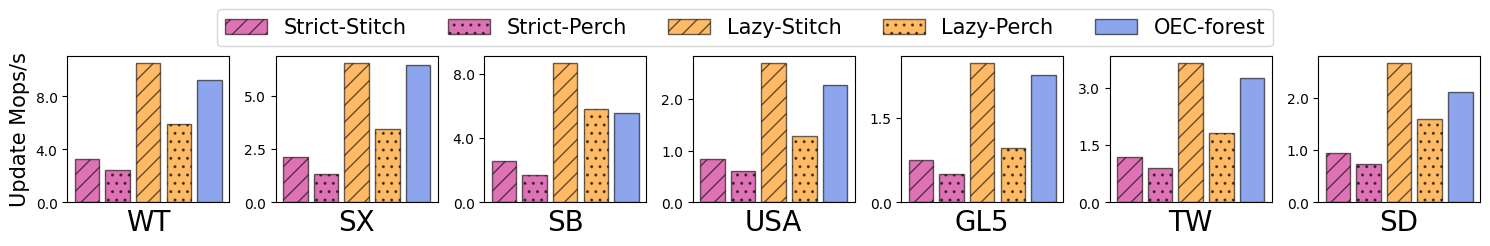

In [356]:
data = '''2.3869	29.7982	47.3981	68.4734	164.9565	1242.4593	2177.5189
3.1972	46.9928	72.1922	96.2417	251.0901	1642.0034	2768.4243
0.7439	9.6813	14.122	21.4116	50.4424	401.613	768.5248
1.3281	18.4693	20.9972	45.0467	128.1453	803.3756	1277.5455
0.8498	9.8069	21.9208	25.479	55.066	450.0624	974.3734'''
data = [list(map(float, line.split('\t'))) for line in data.split('\n')]
data = np.array(data)
for i in range(7):
    data[:, i] = ms[i] / data[:, i]
data = data / 1e6
print(data)

# **创建 2x4 子图网格**
fig, axes = plt.subplots(1, 7, figsize=(15, 2.1))

draw(axes[0], methods[:-1], data[:, 0], graph_names[0], hatch=hatches[:-1])
draw(axes[1], methods[:-1], data[:, 1], graph_names[1], hatch=hatches[:-1])
draw(axes[2], methods[:-1], data[:, 2], graph_names[2], hatch=hatches[:-1])
draw(axes[3], methods[:-1], data[:, 3], graph_names[3], hatch=hatches[:-1])
draw(axes[4], methods[:-1], data[:, 4], graph_names[4], hatch=hatches[:-1])
draw(axes[5], methods[:-1], data[:, 5], graph_names[5], hatch=hatches[:-1])
draw(axes[6], methods[:-1], data[:, 6], graph_names[6], hatch=hatches[:-1])

axes[0].set_ylabel("Update Mops/s", fontsize=15)

handles = [plt.Rectangle((0, 0), 1, 1, facecolor=colors[i], edgecolor='black') for i in range(len(methods[:-1]))]
for handle in handles:
    handle.set_alpha(0.6)
handles[0].set_hatch('//')
handles[1].set_hatch('..')
handles[2].set_hatch('//')
handles[3].set_hatch('..')
fig.legend(handles, methods, loc="upper center", ncol=6, fontsize=15, bbox_to_anchor=(0.5, 1.2))


# **美化布局**
plt.tight_layout()
plt.savefig('persistent_build.pdf', bbox_inches='tight')
plt.show()

[[1.60947142 1.81257273 1.19413536 0.96350252 0.70908408 0.8769622
  1.08564195]
 [0.85855629 0.78601769 0.5886522  0.47424607 0.23698715 0.23477331
  0.30628922]
 [1.68018092 1.80737046 1.2453114  0.98588994 0.71196978 0.85884533
  0.70910117]
 [0.57833221 0.51972891 0.40085848 0.33554863 0.14283992 0.15799775
  0.26866193]
 [1.33890676 2.49481079 0.81177529 0.88387789 0.45958755 0.33989928
  0.28680924]]


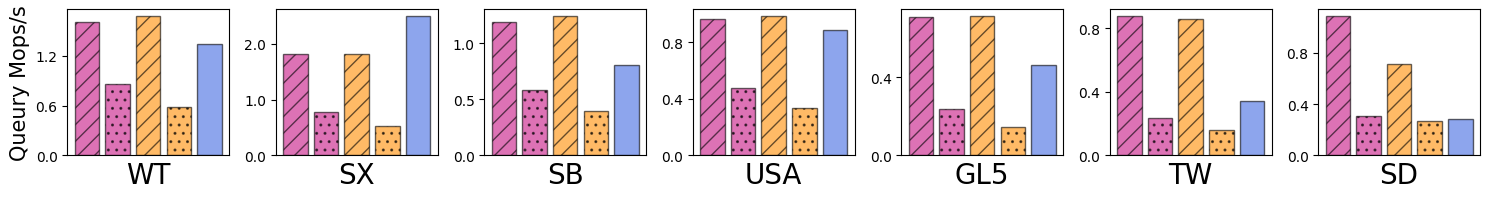

In [357]:
data = '''31.0661	27.5851	41.8713	51.894	70.5135	57.015	46.0557
58.2373	63.6118	84.9398	105.4305	210.9819	212.9714	163.2444
29.7587	27.6645	40.1506	50.7156	70.2277	58.2177	70.5118
86.4555	96.204	124.7323	149.0097	350.0422	316.4602	186.1075
37.3439	20.0416	61.5934	56.5689	108.7932	147.1024	174.3319'''
data = [list(map(float, line.split('\t'))) for line in data.split('\n')]
data = np.array(data)
data = qq / data
data = data / 1e6
print(data)

# **创建 2x4 子图网格**
fig, axes = plt.subplots(1, 7, figsize=(15, 2.1))

draw(axes[0], methods[:-1], data[:, 0], graph_names[0], hatch=hatches[:-1])
draw(axes[1], methods[:-1], data[:, 1], graph_names[1], hatch=hatches[:-1])
draw(axes[2], methods[:-1], data[:, 2], graph_names[2], hatch=hatches[:-1])
draw(axes[3], methods[:-1], data[:, 3], graph_names[3], hatch=hatches[:-1])
draw(axes[4], methods[:-1], data[:, 4], graph_names[4], hatch=hatches[:-1])
draw(axes[5], methods[:-1], data[:, 5], graph_names[5], hatch=hatches[:-1])
draw(axes[6], methods[:-1], data[:, 6], graph_names[6], hatch=hatches[:-1])

axes[0].set_ylabel("Queury Mops/s", fontsize=15)

# handles = [plt.Rectangle((0, 0), 1, 1, facecolor=colors[i], edgecolor='grey') for i in range(len(methods[:-1]))]
# for handle in handles:
#     handle.set_alpha(0.6)
#     handle.set_hatch('/')
# fig.legend(handles, methods, loc="upper center", ncol=6, fontsize=12, bbox_to_anchor=(0.5, 1.15))


# **美化布局**
plt.tight_layout()
plt.savefig('persistent_query.pdf', bbox_inches='tight')
plt.show()

In [358]:
data = '''7.688557	13.918965	4.613591	3.23999	6.039316	35.983471	23.296778
19.216832	33.922177	6.807327	9.256292	25.401372	117.859365	64.508144
7.680986	13.902218	4.610021	3.229282	6.032655	35.981779	23.296553
24.735657	43.234028	7.988815	10.613398	33.275655	138.070531	80.217575
9.998519	15.517162	5.955891	4.210597	8.974752	53.897398	34.839822'''
data = [list(map(float, line.split('\t'))) for line in data.split('\n')]
data = np.array(data)
for i in range(7):
    data[:, i] *= ns[i]
data = data / 1e6
for i in range(len(data)):
    print(data[i])

[   8.76610057   83.8516172   113.38076583   77.58916805  150.23993127
 1498.79184627 2079.18476248]
[  21.91005179  204.35638716  167.29266823  221.66364571  631.90937241
 4909.10549649 5757.20599909]
[   8.75746851   83.75072873  113.29303171   77.33273984  150.07422572
 1498.7213707  2079.16468174]
[  28.20233459  260.45350109  196.32818834  254.16273537  827.79773737
 5750.9456515  7159.23719681]
[  11.39980144   93.47958904  146.36830243  100.83263165  223.26470806
 2244.94687179 3109.37534066]


[[  1.8143  22.6149  37.3836  54.7756 134.3185]
 [  2.1569  32.6846  54.0681  69.1936 171.0076]
 [  0.4462   5.7358   8.216   11.9373  27.2379]
 [  0.4509   6.6565   8.6396  18.07    46.9948]]
[[  2.2974  25.1215  41.4053  56.2355 139.5749]
 [  2.4469  34.6848  58.8336  71.9741 178.5766]
 [  0.6342   7.0327  10.7493  13.9289  31.9231]
 [  0.6508   8.2598  11.2554  20.4415  53.566 ]]


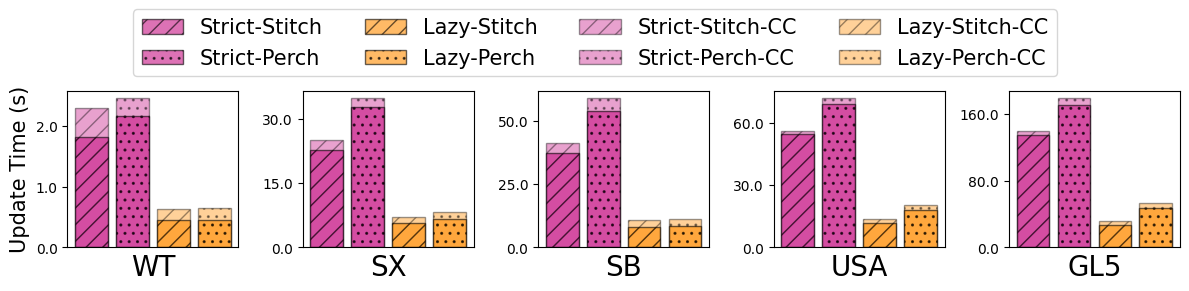

In [359]:
data1 = '''1.8143	22.6149	37.3836	54.7756	134.3185
2.1569	32.6846	54.0681	69.1936	171.0076
0.4462	5.7358	8.216	11.9373	27.2379
0.4509	6.6565	8.6396	18.07	46.9948'''
data1 = [list(map(float, line.split('\t'))) for line in data1.split('\n')]
data1 = np.array(data1)
print(data1)

data2 = '''2.2974	25.1215	41.4053	56.2355	139.5749
2.4469	34.6848	58.8336	71.9741	178.5766
0.6342	7.0327	10.7493	13.9289	31.9231
0.6508	8.2598	11.2554	20.4415	53.566'''
data2 = [list(map(float, line.split('\t'))) for line in data2.split('\n')]
data2 = np.array(data2)
print(data2)

# **创建 2x4 子图网格**
fig, axes = plt.subplots(1, 5, figsize=(12, 2.2))

draw(axes[0], methods[:-2], data2[:, 0], graph_names[0], hatch=hatches[:-2], use_sci=False, alpha=0.4)
draw(axes[1], methods[:-2], data2[:, 1], graph_names[1], hatch=hatches[:-2], use_sci=False, alpha=0.4)
draw(axes[2], methods[:-2], data2[:, 2], graph_names[2], hatch=hatches[:-2], use_sci=False, alpha=0.4)
draw(axes[3], methods[:-2], data2[:, 3], graph_names[3], hatch=hatches[:-2], use_sci=False, alpha=0.4)
draw(axes[4], methods[:-2], data2[:, 4], graph_names[4], hatch=hatches[:-2], use_sci=False, alpha=0.4)
draw(axes[0], methods[:-2], data1[:, 0], graph_names[0], hatch=hatches[:-2], use_sci=False)
draw(axes[1], methods[:-2], data1[:, 1], graph_names[1], hatch=hatches[:-2], use_sci=False)
draw(axes[2], methods[:-2], data1[:, 2], graph_names[2], hatch=hatches[:-2], use_sci=False)
draw(axes[3], methods[:-2], data1[:, 3], graph_names[3], hatch=hatches[:-2], use_sci=False)
draw(axes[4], methods[:-2], data1[:, 4], graph_names[4], hatch=hatches[:-2], use_sci=False)

axes[0].set_ylabel("Update Time (s)", fontsize=15)

handles = [plt.Rectangle((0, 0), 1, 1, facecolor=colors[i], edgecolor='black') for i in range(len(methods[:-2]))]
for handle in handles:
    handle.set_alpha(0.6)
handles[0].set_hatch('//')
handles[1].set_hatch('..')
handles[2].set_hatch('//')
handles[3].set_hatch('..')

handles2 = [plt.Rectangle((0, 0), 1, 1, facecolor=colors[i], edgecolor='black') for i in range(len(methods[:-2]))]
for handle in handles2:
    handle.set_alpha(0.4)
handles2[0].set_hatch('//')
handles2[1].set_hatch('..')
handles2[2].set_hatch('//')
handles2[3].set_hatch('..')
handles.extend(handles2)
labels = methods[:-2] + [
    'Strict-Stitch-CC', 'Strict-Perch-CC', 'Lazy-Stitch-CC', 'Lazy-Perch-CC',
]
fig.legend(handles, labels, loc="upper center", ncol=4, fontsize=15, bbox_to_anchor=(0.5, 1.35))


# **美化布局**
plt.tight_layout()
plt.savefig('streaming-count-cc.pdf', bbox_inches='tight')
plt.show()

[[  2.3869  29.7982  47.3981  68.4734 164.9565]
 [  3.1972  46.9928  72.1922  96.2417 251.0901]
 [  0.7439   9.6813  14.122   21.4116  50.4424]
 [  1.3281  18.4693  20.9972  45.0467 128.1453]]
[[  4.4917  40.5001  65.7406  78.7683 189.6265]
 [  4.8915  57.8968  86.7243 144.1342 278.5665]
 [  2.2882  19.9844  32.2141  48.9711  77.8966]
 [  2.8497  28.8601  34.2624  68.5648 156.5477]]


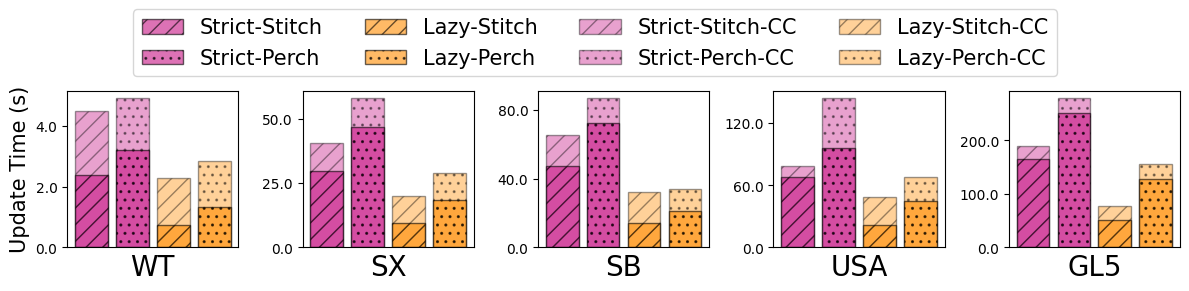

In [360]:
data1 = '''2.3869	29.7982	47.3981	68.4734	164.9565
3.1972	46.9928	72.1922	96.2417	251.0901
0.7439	9.6813	14.122	21.4116	50.4424
1.3281	18.4693	20.9972	45.0467	128.1453'''
data1 = [list(map(float, line.split('\t'))) for line in data1.split('\n')]
data1 = np.array(data1)
print(data1)

data2 = '''4.4917	40.5001	65.7406	78.7683	189.6265
4.8915	57.8968	86.7243	144.1342	278.5665
2.2882	19.9844	32.2141	48.9711	77.8966
2.8497	28.8601	34.2624	68.5648	156.5477'''
data2 = [list(map(float, line.split('\t'))) for line in data2.split('\n')]
data2 = np.array(data2)
print(data2)

# **创建 2x4 子图网格**
fig, axes = plt.subplots(1, 5, figsize=(12, 2.2))

draw(axes[0], methods[:-2], data2[:, 0], graph_names[0], hatch=hatches[:-2], use_sci=False, alpha=0.4)
draw(axes[1], methods[:-2], data2[:, 1], graph_names[1], hatch=hatches[:-2], use_sci=False, alpha=0.4)
draw(axes[2], methods[:-2], data2[:, 2], graph_names[2], hatch=hatches[:-2], use_sci=False, alpha=0.4)
draw(axes[3], methods[:-2], data2[:, 3], graph_names[3], hatch=hatches[:-2], use_sci=False, alpha=0.4)
draw(axes[4], methods[:-2], data2[:, 4], graph_names[4], hatch=hatches[:-2], use_sci=False, alpha=0.4)
draw(axes[0], methods[:-2], data1[:, 0], graph_names[0], hatch=hatches[:-2], use_sci=False)
draw(axes[1], methods[:-2], data1[:, 1], graph_names[1], hatch=hatches[:-2], use_sci=False)
draw(axes[2], methods[:-2], data1[:, 2], graph_names[2], hatch=hatches[:-2], use_sci=False)
draw(axes[3], methods[:-2], data1[:, 3], graph_names[3], hatch=hatches[:-2], use_sci=False)
draw(axes[4], methods[:-2], data1[:, 4], graph_names[4], hatch=hatches[:-2], use_sci=False)

axes[0].set_ylabel("Update Time (s)", fontsize=15)

handles = [plt.Rectangle((0, 0), 1, 1, facecolor=colors[i], edgecolor='black') for i in range(len(methods[:-2]))]
for handle in handles:
    handle.set_alpha(0.6)
handles[0].set_hatch('//')
handles[1].set_hatch('..')
handles[2].set_hatch('//')
handles[3].set_hatch('..')

handles2 = [plt.Rectangle((0, 0), 1, 1, facecolor=colors[i], edgecolor='black') for i in range(len(methods[:-2]))]
for handle in handles2:
    handle.set_alpha(0.4)
handles2[0].set_hatch('//')
handles2[1].set_hatch('..')
handles2[2].set_hatch('//')
handles2[3].set_hatch('..')
handles.extend(handles2)
labels = methods[:-2] + [
    'Strict-Stitch-CC', 'Strict-Perch-CC', 'Lazy-Stitch-CC', 'Lazy-Perch-CC',
]
fig.legend(handles, labels, loc="upper center", ncol=4, fontsize=15, bbox_to_anchor=(0.5, 1.35))


# **美化布局**
plt.tight_layout()
plt.savefig('persistent-count-cc.pdf', bbox_inches='tight')
plt.show()